In [149]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle

In [150]:
Rayons=(np.array([3.06,3.96,4.97])/2)/100
err_Rayons = (np.array([0.94, 1.49, 1.3]))/100

masse_vide = 25/1000
errMasse = np.array([2, 2, 4, 8, 16, 32, 64, 128])/1000            # TODO trouver lincertitude sur la masse 
Masses=np.array([0  , 100 , 200 , 400 , 800 , 1600, 3200, 6400])/1000

R =  [ np.array([7.5, 7.5 , 10.0, 10.0, 12.5, 15.0, 20  , 22.5])/1000, 
       np.array([5.0, 7.5 , 7.5 , 10.0, 12.5, 15.0, 22.5, 30.0])/1000, 
       np.array([5.0, 10.0, 10.0, 12.5, 15.0, 17.5, 22.5, 30.0])/1000]

V =  [ np.array([5.0, 5.0 , 5.0 , 7.5 , 7.5 , 10.0, 10  , 12.5])/1000, 
       np.array([2.5, 5.0 , 5.0 , 5.0 , 7.5 , 10.0, 12.5, 15.0])/1000, 
       np.array([2.5, 5.0 , 5.0 , 7.5 , 10.0, 10.0, 12.5, 15.0])/1000]

B =  [ np.array([5.0, 5.0 , 5.0 , 7.5 , 10.0, 10.0, 12.5, 15.0])/1000, 
       np.array([5.0, 5.0 , 7.5 , 7.5 , 10.0, 12.5, 12.5, 17.5])/1000,
       np.array([5.0, 5.0 , 7.5 , 7.5 , 10.0, 12.5, 15.0, 20.0])/1000]

Masses = Masses + masse_vide # TODO mesurer la masse a vide 

Contact de Hertz
============

# Les $\Pi$

$d_{alonge} = f(g, r, m, Y)$

$[g] = LT^{-2}$

$[r] = L$

$[m] = M$

$[Y] = ML^{-1}T^{-2}$

5 parametres 3 dimensions => T M L => 2 nombres Pi

$\Pi_1 = \frac{d_{alonge}}{r}$

$\Pi_2 = \frac{Yr^2}{gm} = \frac{Y}{gmr^{-2}}$

$\Pi_1 = A\Pi_{2}^{\alpha}$

$\log{\Pi_1} = \log{A} + \alpha \log{\Pi_2}$

# Questions 
Est il normal que on a dans nos deux pi le rayon et que ca change les deux en meme temps 

In [151]:
# d alonge cest notre mesurement 
def Pi1(d_alonge, rayon):
    return d_alonge/rayon

def Pi2(Y, m, r, g = 9.81):
    return (Y*r*r)/(g*m)

In [152]:
ToutLesSpheres = [R, V, B]
Noms = ["Rose", "Vert", "Bleu"]
YoungsGPa = np.array([0.000142, 0.001180, 0.000358]) # TODO check ca. valeurs qui vient de projet.ipynb 
YoungsMpa = 1e3*YoungsGPa 
YoungPa = YoungsGPa*1e9
markers = [ 'left', 'right', 'bottom']
Young_err = 0
PI1 = []
PI2 = []
for i in range(len(ToutLesSpheres)):
    PI1.append(Pi1(ToutLesSpheres[i], Rayons[i]))
    PI2.append(Pi2(YoungPa[i], Masses, Rayons[i]))
print(PI1[0])
print(PI1[0][0])

[[0.49019608 0.49019608 0.65359477 0.65359477 0.81699346 0.98039216
  1.30718954 1.47058824]
 [0.32679739 0.49019608 0.49019608 0.65359477 0.81699346 0.98039216
  1.47058824 1.96078431]
 [0.32679739 0.65359477 0.65359477 0.81699346 0.98039216 1.14379085
  1.47058824 1.96078431]]
[0.49019608 0.49019608 0.65359477 0.65359477 0.81699346 0.98039216
 1.30718954 1.47058824]


-0.29853698306666504


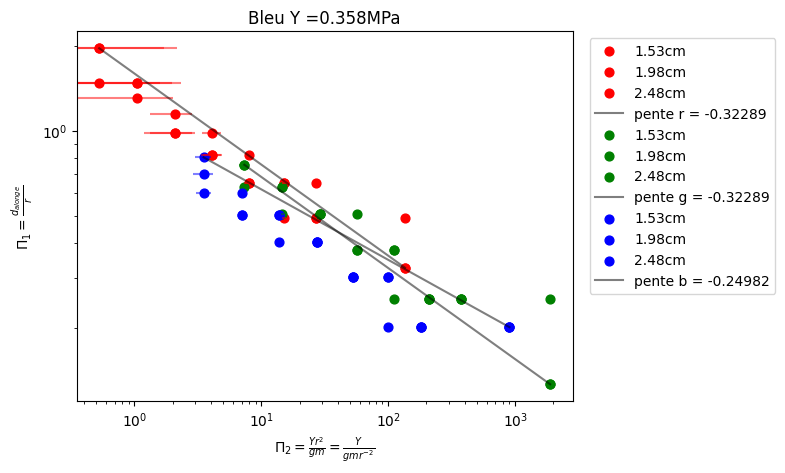

In [153]:
def TousSur1Graph(nb, alongations, Masses, Rayons, nomGraph, Youngs, AX, COLOR, pi2_err = 1.5/1000, loglog = True):
    minx =  99999999
    miny =  99999999
    maxx = -99999999
    maxy = -99999999
    for i in range(len(ToutLesSpheres)):  
        X = PI2[nb]#Pi2(Youngs, Masses, Rayons[i])
        Y = PI1[nb][i]#Pi1(alongations[i], Rayons[i])
        Pi2_err = (2.5e-3)/alongations[i]*Y + err_Rayons[i]/Rayons[i]*Y
        Pi1_err = 0
        AX.errorbar( X, Y, xerr = Pi2_err, yerr=Pi1_err, 
                        marker = None,#MarkerStyle('o', fillstyle=markers[i])
                        color = COLOR, ls = 'none', alpha = 0.5
                    )
        AX.scatter(X, Y, s= 40, label = "{:.2f}cm".format(Rayons[i]*100), color = COLOR#, alpha = 0.5, marker = MarkerStyle("o", fillstyle=markers[i])
                    )
        for c in range(len(X)):
            if X[c] <= minx:
                minx = X[c]
                miny = Y[c]
            if X[c] >= maxx:
                maxx = X[c]
                maxy = Y[c]
    pente = (np.log(maxy) - np.log(miny))/(np.log(maxx)-np.log(minx))
    AX.plot([minx, maxx], [miny, maxy], c = "k", alpha = 0.5, label = "pente "+ COLOR +" = %.5f" %pente)
    # pas touche la mouche 
    plt.legend(bbox_to_anchor=(1.02, 1.0),loc='upper left')
    plt.title(nomGraph + " Y =" + "%.3f" %YoungsMpa[nb] + "MPa")
    plt.xlabel("$\Pi_2 = \\frac{Yr^2}{gm} = \\frac{Y}{gmr^{-2}}$")
    plt.ylabel("$\Pi_1 = \\frac{d_{alonge}}{r}$")
    if loglog:
        AX.set_xscale('log')
        AX.set_yscale('log')
    return pente
    #plt.savefig("image.png")
COLORS = ["r", "g", "b"]
fig, AX = plt.subplots()
PENTES = []
for i in range(len(ToutLesSpheres)):
    PENTES.append(TousSur1Graph(i, ToutLesSpheres[i], Masses, Rayons, Noms[i], YoungPa[i], AX, COLORS[i]))
ALPHA = np.average(PENTES)
print(ALPHA)
plt.savefig("Tous.png", dpi = 500) 
plt.show()
plt.close()

In [154]:
def valeurs(Y, r, m, g):
    val = r*(((Y * r**2) / (g * m))**(-0.3))
    print(val)
    return val
def graph():
    fig, ax = plt.subplots()
    for r in range(3):
        AX.errorbar( X, Y, xerr = Pi2_err, yerr=Pi1_err, 
                        marker = None,#MarkerStyle('o', fillstyle=markers[i])
                        color = COLOR, ls = 'none', alpha = 0.5
                    )
        AX.scatter(X, Y, s= 40, label = "{:.2f}cm".format(Rayons[i]*100), color = COLOR#, alpha = 0.5, marker = MarkerStyle("o", fillstyle=markers[i])
                    )
        
valeurs(YoungPa[1],Rayons[0],Masses[7],9.81) 

0.00982142742853142


0.00982142742853142

In [155]:
def Graph1FonctionDe2(nb, j, alongations, Masse, Rayon, nomGraph, Young, loglog = True): #On mets reayon fixe
    minx =  99999999
    miny =  99999999
    maxx = -99999999
    maxy = -99999999
    X = Pi2(Young, Masse, Rayon)
    Y = Pi1(alongations, Rayon)
    fig, ax = plt.subplots()
           
    ax.errorbar( X, Y, xerr = 1.5, yerr = errMasse, 
                    marker = None,#MarkerStyle('o', fillstyle=markers[i])
                    ls = 'none', alpha = 0.5
                )
    ax.scatter(X, Y, marker = MarkerStyle("o", fillstyle=markers[j]), s= 40, label = str(Rayon)#, alpha = 0.5
                )
    for c in range(len(X)):
            if X[c] <= minx:
                minx = X[c]
                miny = Y[c]
            if X[c] >= maxx:
                maxx = X[c]
                maxy = Y[c]
    pente = (maxy - miny)/(maxx-minx)
    ax.plot([minx, maxx], [miny, maxy], c = "k", alpha = 0.5, label = "pente = %.5f" %pente)
    # pas touche la mouche 
    plt.legend(loc='lower left')
    plt.title(nomGraph + " Y =" + "%.3f" %YoungsMpa[nb] + "MPa")
    plt.xlabel("$\Pi_2 = \\frac{Yr^2}{gm} = \\frac{Y}{gmr^{-2}}$")
    plt.ylabel("$\Pi_1 = \\frac{d_{alonge}}{r}$")
    if loglog:
        ax.set_xscale('log')
        ax.set_yscale('log')
    #plt.savefig("image.png")
    plt.show()
    plt.close()

In [156]:
def Graph1FonctionDe2Tous(nb, alongations, Masses, Rayons, nomGraph, Youngs, loglog = True): #On mets reayon fixe
    fig, ax = plt.subplots()
    minx =  99999999
    miny =  99999999
    maxx = -99999999
    maxy = -99999999
    for i in range(len(ToutLesSpheres)):  
        X = Pi2(Youngs, Masses, Rayons[i])
        Y = Pi1(alongations[i], Rayons[i])
        ax.errorbar( X, Y, xerr = 1.5, yerr = 1/1000,#errMasse, 
                        marker = None,#MarkerStyle('o', fillstyle=markers[i])
                        ls = 'none', alpha = 0.5
                    )
        ax.scatter(X, Y, marker = MarkerStyle("o", fillstyle=markers[i]), s= 40, label = str(Rayons[i])#, alpha = 0.5
                    )
        for c in range(len(X)):
            if X[c] <= minx:
                minx = X[c]
                miny = Y[c]
            if X[c] >= maxx:
                maxx = X[c]
                maxy = Y[c]
    pente = (maxy - miny)/(maxx-minx)
    ax.plot([minx, maxx], [miny, maxy], c = "k", alpha = 0.5, label = "pente = %.5f" %pente)
    # pas touche la mouche 
    plt.legend(loc='lower left')
    plt.title(nomGraph + " Y =" + "%.3f" %YoungsMpa[nb] + "MPa")
    plt.xlabel("$\Pi_2 = \\frac{Yr^2}{gm} = \\frac{Y}{gmr^{-2}}$")
    plt.ylabel("$\Pi_1 = \\frac{d_{alonge}}{r}$")
    if loglog:
        ax.set_xscale('log')
        ax.set_yscale('log')
    #plt.savefig("image.png")
    plt.show()
    plt.close()

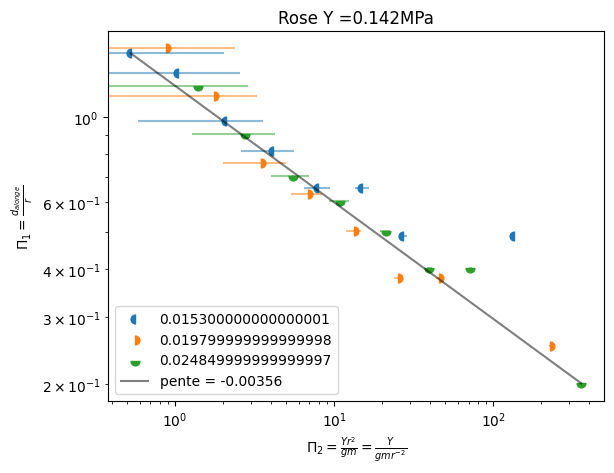

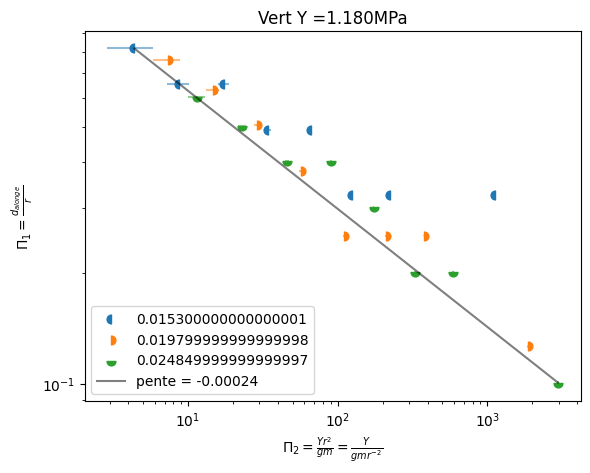

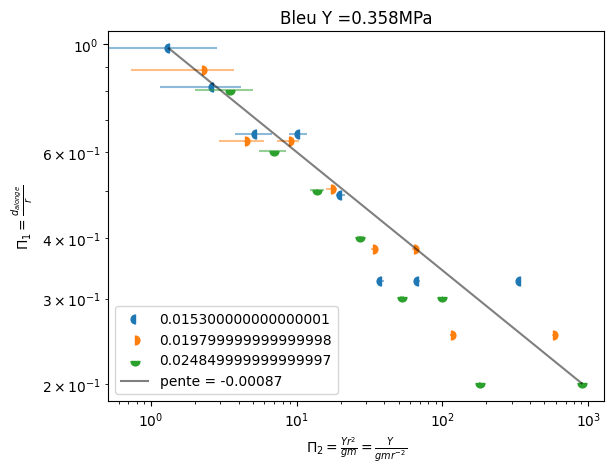

In [157]:
for i in range(len(ToutLesSpheres)):
    Graph1FonctionDe2Tous(i, ToutLesSpheres[i], Masses, Rayons, Noms[i], YoungPa[i])

In [158]:
# for i in range(len(ToutLesSpheres)):
#     for j in range(len(ToutLesSpheres)):
#         Graph1FonctionDe2(i ,j, ToutLesSpheres[i][j], Masses, Rayons[j], Noms[i] + str(j), YoungPa[i])

In [159]:
# def GraphMasseDeformation(X : list, nomGraph : str, nb ,loglog = True):
#     fig, ax = plt.subplots()
#     for i in range(len(Rayons)):            
#         ax.errorbar( X[i], Masses, xerr = 1.5, yerr = errMasse, 
#                      marker = None,#MarkerStyle('o', fillstyle=markers[i])
#                      ls = 'none', alpha = 0.5
#                    )
#         ax.scatter(X[i], Masses, marker = MarkerStyle("o", fillstyle=markers[i]), s= 40, label = str(Rayons[i])#, alpha = 0.5
#                    )
#     # pas touche la mouche 
#     plt.legend(loc='upper left')
#     plt.title(nomGraph + " Y =" + "%.3f" %YoungsMpa[nb] + "MPa")
#     plt.xlabel("Deformation diametre en mm")
#     plt.ylabel("Masse en gr")
#     if loglog:
#         ax.set_xscale('log')
#         ax.set_yscale('log')
#     #plt.savefig("image.png")
#     plt.show()
#     plt.close()
    

In [160]:
# for i in range(len(ToutLesSpheres)):
#     GraphMasseDeformation(ToutLesSpheres[i], Noms[i], i, False)
# fig, ax = plt.subplots() 
# ax.errorbar(R[0], Masse, xerr = 1.5, yerr = errMasse, fmt = "o", label = Rayons[i], alpha = 0.7)
# ax.set_xscale('log')
# ax.set_yscale('log')